***Задание***: показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется **O(1/m + L/p)**. Подробнее в материалах лекции. Построить графики зависимости FPR от длинны строк L и простого модуля p.

Эксперименты провести для **L = np.linspace(10, 100, 11)** и **10 простых чисел p из интервала (100, 1000)** 

Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.

In [66]:
import numpy as np
import random
import string

import matplotlib.pyplot as plt
%matplotlib inline

Из [семинарской тетрадки](https://github.com/thedenaas/hse_seminars_2018/blob/master/seminar_1/algorithms.ipynb), воспользуемся функцией хэширования:

In [58]:
def poly_hash(s, p=997, x=31):
    h = 0
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
    return h

Напишем две функции, которые:

    1.Будет генерировать все простые числа в заданном промежутке.
    2.Будет генерировать строки с заданым seed'ом это нам понадобится для того, чтобы в дальнейшем проводить эксперименты.

In [60]:
def primes_generator(min, max):
    for num in range(min, max):
        if all(num % i !=0 for i in range(2, num)):
            yield num
    
def string_generator(n_strings, string_len, seed=25):
    
    chars = string.ascii_uppercase
    
    random.seed(seed)
    output = set()
    
    for i in range(n_strings):
        output.add(''.join(random.choice(chars) for i in range(string_len)))

    return output

Зададим сразу значения для всех переменных, которые будем использовать далее.

In [84]:
L = list(np.linspace(10, 100, 11))
P = sorted(random.sample(list(primes_generator(100,1000)), 10))
seeds = random.sample(range(500), 10)
n = 1000

Проведем эксперимент с фиксированным **P**.

Значение **P** будет указано на графике.

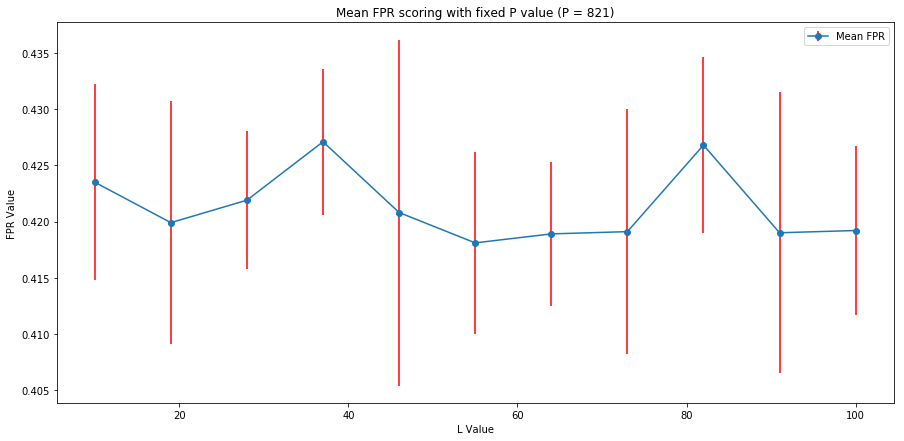

In [95]:
p = int(random.choice(P))

MFP, SFP = list(), list()

for l in L:
    
    p_collision = list()
    
    for seed in seeds:
        
        hashing_result, seed_collision = list(), 0
        strings = string_generator(n_strings=n,
                                   string_len=int(l),
                                   seed=seed)
    
        for line in strings:
            
            line_hash = poly_hash(line, p=p)

            if line_hash in hashing_result:

                seed_collision += 1

            hashing_result.append(line_hash)

        p_collision.append(seed_collision / n)
        
    MFL.append(np.mean(p_collision))
    SFL.append(np.std(p_collision))
        
plt.figure(figsize=(15, 7))
plt.title('Mean FPR scoring with fixed P value (P = %d)' % p)
plt.xlabel('L Value')
plt.ylabel('FPR Value')
plt.errorbar(x=L,
             y=MFP,
             yerr=SFP,
             fmt='-o',
             ecolor='red',
             label='Mean FPR')
plt.legend()
plt.show()

Итак, мы предполагаем, что при повышении **L**, наш **FPR** должен увеличиваться (Исходя из **O(1/m + L/p)**). Действительно, в некоторых местах наблюдается рост, однако точно сказать ничего нельзя, ведь монотонного измениния мы не наблюдаем.

Повторим эксперимент уже с фиксированным **L**.

Значение **L** будет указано на графике.

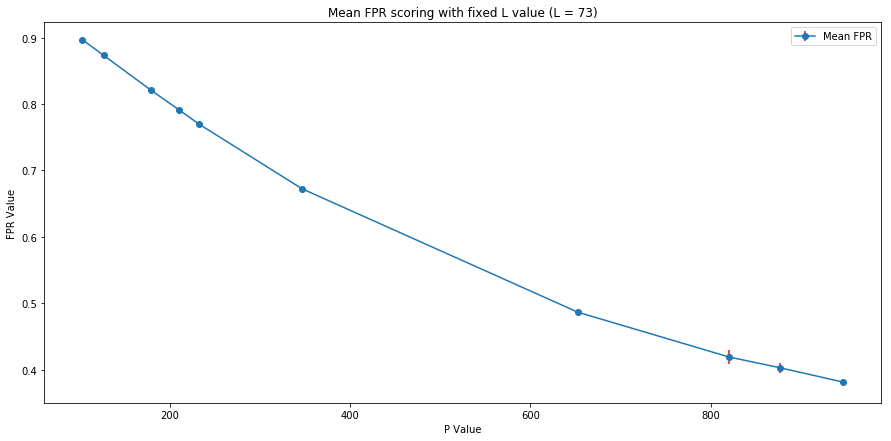

In [96]:
l = int(random.choice(L))

MFL, SFL = list(), list()

for p in P:
    
    p_collision = list()
    
    for seed in seeds:
        
        hashing_result, seed_collision = list(), 0
        strings = string_generator(n_strings=n,
                                   string_len=l,
                                   seed=seed)
    
        for line in strings:
            
            line_hash = poly_hash(line, p=p)

            if line_hash in hashing_result:

                seed_collision += 1

            hashing_result.append(line_hash)

        p_collision.append(seed_collision / n)
        
    MFL.append(np.mean(p_collision))
    SFL.append(np.std(p_collision))
        
plt.figure(figsize=(15, 7))
plt.title('Mean FPR scoring with fixed L value (L = %d)' % l)
plt.xlabel('P Value')
plt.ylabel('FPR Value')
plt.errorbar(x=P,
             y=MFL,
             yerr=SFL,
             fmt='-o',
             ecolor='red',
             label='Mean FPR')
plt.legend()
plt.show()

По данному графику мы можем заметить, что с ростом **P**, мы наблюдаем ожидаемое уменьшение коолизии (Соответсвует  **O(1/m + L/p)**). Что и следовало доказать.